In [1]:
# 참고 : https://codetorial.net/tensorflow/training_logic_and_operation.html

#### 5.AND 로직 연산 학습하기
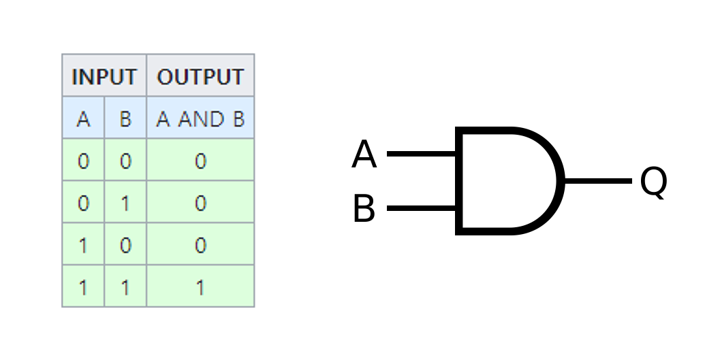

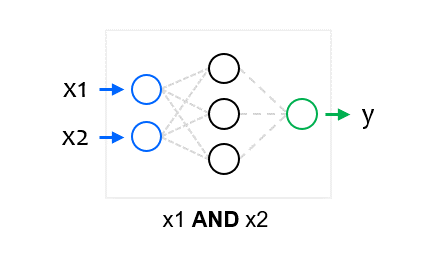
#### 위 그림은 두 개의 입력값을 받고, 하나의 값을 출력하는 간단한 인공신경망 (Artificial Neural Network)을 나타냅니다.
#### 이제 TensorFlow를 이용해서 두 입력값에 대해 AND 논리 연산의 결과를 출력하는 신경망을 구현해보겠습니다.

1) 훈련 데이터 준비하기

2) Neural Network 구성하기

3) Neural Network 컴파일하기

4) Neural Network 훈련하기

5) 손실값 확인하기

6) 훈련 결과 확인하기

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

tf.random.set_seed(0)

# 1. 훈련 데이터 준비하기
# x는 입력, y는 결과
x_train = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_train = [[0], [0], [0], [1]]

은닉층 (Hidden layer)의 활성화함수로 ReLU (Rectified Linear Unit)를 사용
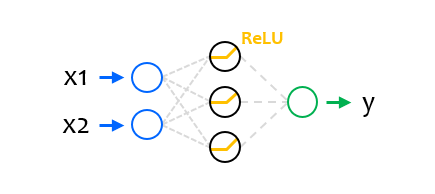

In [3]:
# 2. Neural Network 구성하기
# 2. 모델 구성하기
model = keras.Sequential([
    keras.layers.Dense(units=3, input_shape=[2], activation='relu'),
    keras.layers.Dense(units=1) # 출력은 1개의 dense
    ])

In [4]:
# 3. 모델 컴파일하기
# 손실 함수로 ‘mse’를, 옵티마이저로 ‘Adam’을 지정
model.compile(loss='mse', optimizer='Adam')

In [5]:
# 4. 모델 훈련하기
pred_before_training = model.predict(x_train)
print('Before Training: \n', pred_before_training)

# 훈련 1000 번 실행
history = model.fit(x_train, y_train, epochs=1000, verbose=0)

pred_after_training = model.predict(x_train)
print('After Training: \n', pred_after_training)

Before Training: 
 [[0.        ]
 [0.6210649 ]
 [0.06930891]
 [0.6721569 ]]
After Training: 
 [[-0.00612798]
 [ 0.00896964]
 [ 0.00497075]
 [ 0.99055487]]


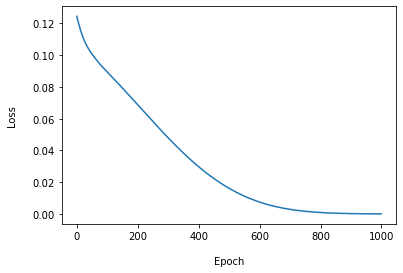

In [6]:
# 5. 손실값 확인하기
# it() 메서드가 반환하는 손실값을 Matplotlib 라이브러리를 사용해서 시각화
import matplotlib.pyplot as plt

loss = history.history['loss']
plt.plot(loss)
plt.xlabel('Epoch', labelpad=15)
plt.ylabel('Loss', labelpad=15)

plt.show()
# 결과는 계속 진행할 수록 손실값은 적어진다.

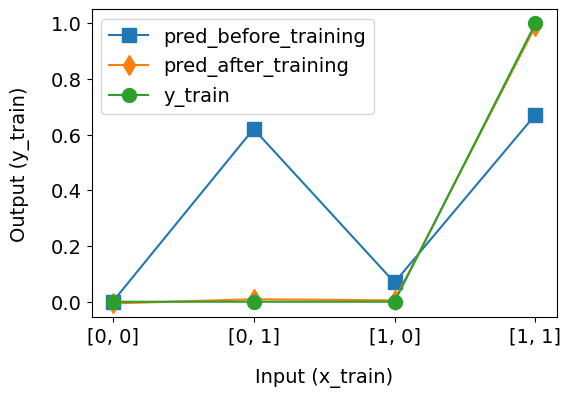

In [7]:
# 6. 훈련 결과 확인하기

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('default')
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

plt.plot(pred_before_training, 's-', markersize=10, label='pred_before_training')
plt.plot(pred_after_training, 'd-', markersize=10, label='pred_after_training')
plt.plot(y_train, 'o-', markersize=10, label='y_train')

plt.xticks(np.arange(4), labels=['[0, 0]', '[0, 1]', '[1, 0]', '[1, 1]'])
plt.xlabel('Input (x_train)', labelpad=15)
plt.ylabel('Output (y_train)', labelpad=15)

plt.legend()
plt.show()

# Matplotlib 라이브러리를 사용해서 훈련 전후의 입력값, 출력값을 나타냈습니다.
# 간단한 신경망에 대해 1000회의 훈련이 이루어지면, 네가지 경우의 0과 1 입력에 대해 1% 미만의 오차로
# AND 연산을 수행할 수 있음을 확인할 수 있습니다.

In [8]:
# 코드 결과 : ytrain은 정답 값을 표시했으며, y train의 값을 훈련 후 데이터가 어느정도 잘 따라옴을 확인할 수 잇다.
# 결과 : 그래도 아직 정확한 AND 연산에 대한 값을 100% 정확하게 찾지는 못한다.

# 의심1 : 어째서 RERU를 사용하는가? 이유는?
# 답변1 : 
    # Neural Network를 처음배울 때 activation function으로 sigmoid function을 사용한다. 
    # sigmoid function이 연속이여서 미분가능한점과 0과 1사이의 값을 가진다는 점 그리고 0에서 1로 변하는 점이 가파르기 때문에 사용해왔다. 
    # 그러나 기존에 사용하던 Simgoid fucntion을 ReLu가 대체하게 된 이유 중 가장 큰 것이 Gradient Vanishing 문제이다. 
    # Simgoid function은 0에서 1사이의 값을 가지는데 gradient descent를 사용해 
    # Backpropagation 수행시 layer를 지나면서 gradient를 계속 곱하므로 gradient는 0으로 수렴하게 된다. 
    # 따라서 layer가 많아지면 잘 작동하지 않게 된다.

    # 따라서 이러한 문제를 해결하기위해 ReLu를 새로운 activation function을 사용한다.
    # ReLu는 입력값이 0보다 작으면 0이고 0보다 크면 입력값 그대로를 내보낸다. 

    # 이러한 ReLu가 가지는 이점은 다음과 같다.
    # 1. Sparse activation : 0이하의 입력에 대해 0을 출력함으로 부분적으로 활성화 시킬수 있다.
    # 2. Efficient gradient propagtion : gradient의 vanishing이 없으며 gradient가 exploding 되지 않는다.
    # 3. Efficient computation : 선형함수이므로 미분 계산이 매우 간단하다.
    # 4. Scale-invariant : 

    # 출처: https://mongxmongx2.tistory.com/25 [몽이몽이몽몽이의 블로그]
